In [52]:
import pandas as pd

In [53]:
import random

In [54]:
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)

    L.append(a + b)

In [55]:
len(L)

10000

In [56]:
L[:5]

[6, 5, 2, 4, 3]

In [57]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [58]:
import numpy as np
np.cumsum(s)

2     0.0307
3     0.0875
4     0.1687
5     0.2856
6     0.4163
7     0.5847
8     0.7244
9     0.8329
10    0.9195
11    0.9743
12    1.0000
dtype: float64

<Axes: >

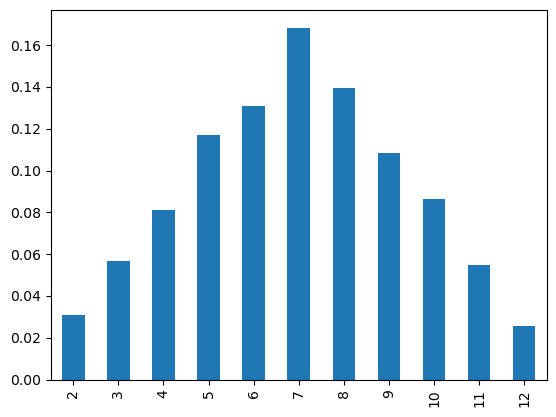

In [59]:
s.plot(kind='bar')

<Axes: >

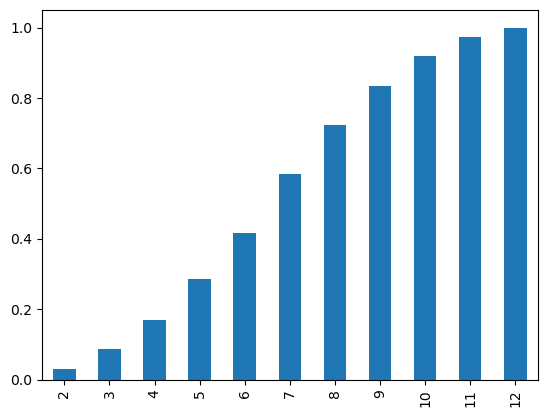

In [60]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = np.random.normal(loc=50, scale=5,size=1000)

In [62]:
sample.mean()

50.03124137158319

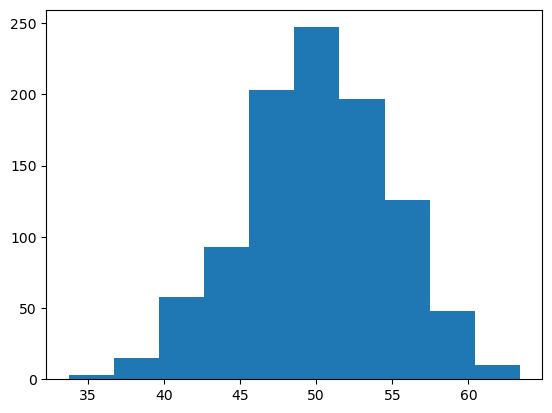

In [63]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)
plt.show()

In [64]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()
sample_mean

50.03124137158319

In [65]:
sample_std

4.80240452315889

In [66]:
# fit the distribution with the above parameters
from scipy.stats import norm
dist = norm(60, 12)

In [67]:
values = np.linspace(sample.min(),sample.max(),100)

In [68]:
sample.max()

63.37709106961728

In [69]:
sample.min()

33.74045714666795

In [17]:
probabilities = [dist.pdf(value) for value in values]

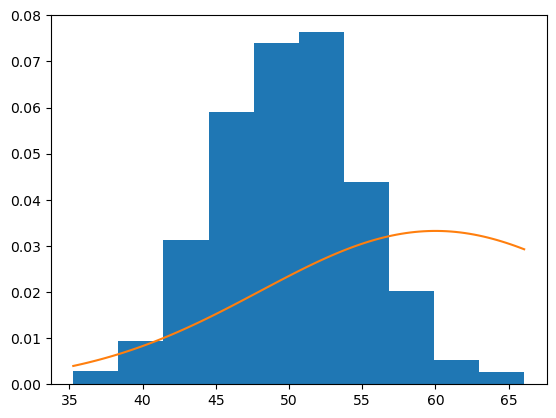

In [18]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\ABC\AppData\Local\Temp\ipykernel_4436\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

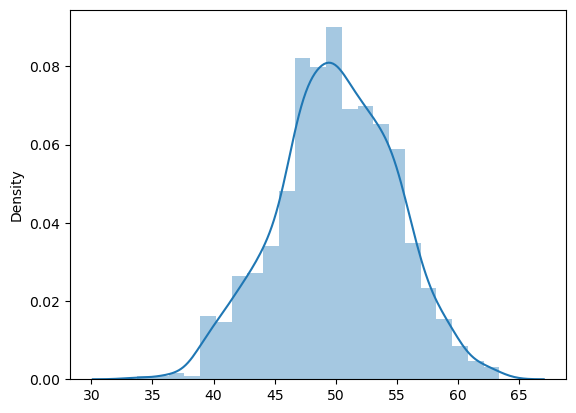

In [70]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [72]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=300)
sample = np.hstack((sample1, sample2))

In [73]:
sample

array([23.3015248 , 14.83010416, 20.07783926, 23.21300732, 22.0219666 ,
       19.15704931, 19.0878091 , 17.83541673, 23.55317336, 16.23650229,
        8.51989055, 12.89762425, 27.34761303, 16.21831846, 19.72429016,
       26.48439083, 26.24828329, 17.13668238, 21.30209225, 16.65460341,
       17.98057887, 19.35420116, 19.66617804, 16.61948432,  8.43567444,
       21.54262441, 17.33279475,  5.21590724,  8.84159772, 21.15994166,
       21.52841454, 21.3083296 , 20.63413979, 23.36387592, 17.22322077,
       22.17150034, 21.71543096, 21.46387606, 23.51907155, 12.16607953,
       15.21019666, 20.04618441, 27.7847948 , 24.23249742, 24.98872131,
       17.8137688 , 13.87057406, 14.4069492 , 21.42551521, 21.55435532,
       28.86390105, 21.00067954, 12.44858076, 23.70264541, 16.97446665,
       17.45899838, 17.36288481, 14.3754356 , 20.76675448, 25.70457813,
       22.73276735, 21.87400096, 31.29557071, 30.48260219, 19.93276856,
       17.82499826, 19.25880275, 23.29021479, 22.13974073, 18.30

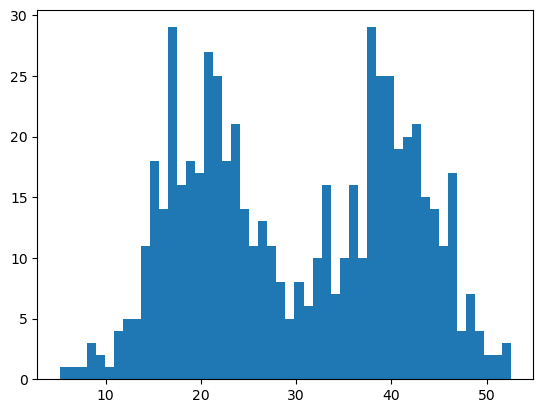

In [74]:
# plot histogram bins=50
plt.hist(sample,bins=50)
plt.show()

In [75]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [24]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [25]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

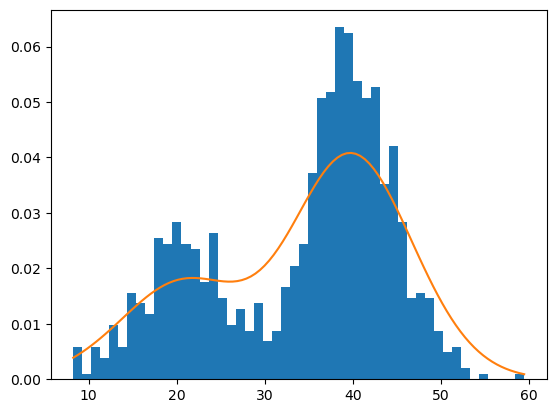

In [26]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

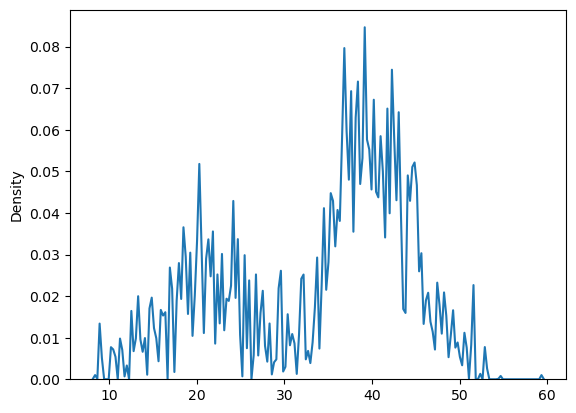

In [27]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [28]:
import seaborn as sns

In [29]:
df = sns.load_dataset('iris')

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

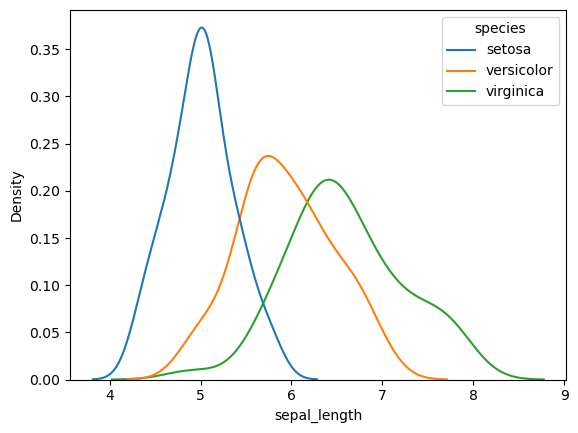

In [31]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

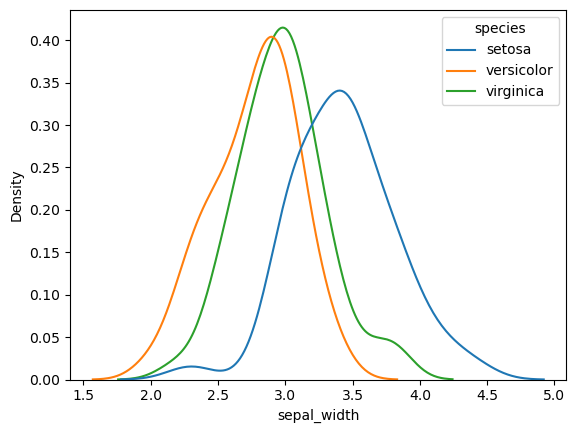

In [32]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

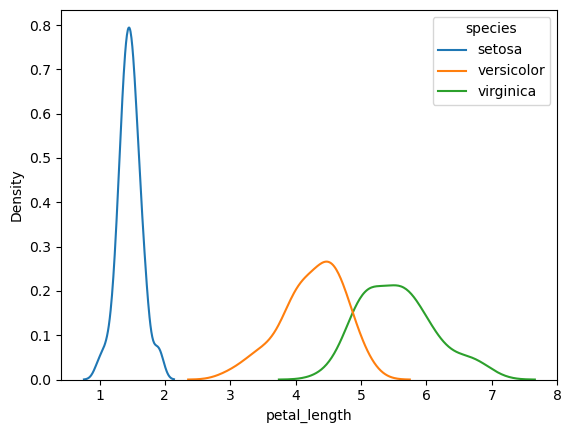

In [33]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

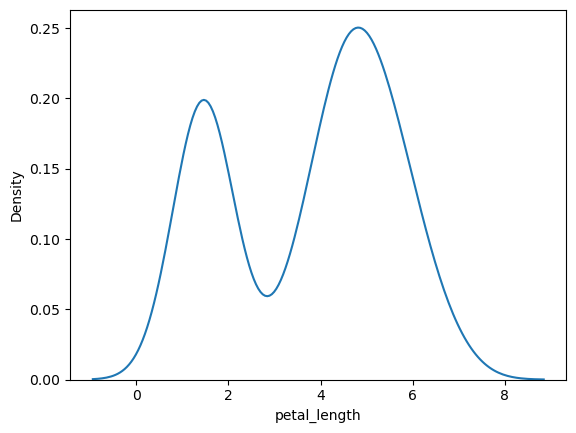

In [77]:
sns.kdeplot(data=df,x='petal_length')

<Axes: xlabel='petal_width', ylabel='Density'>

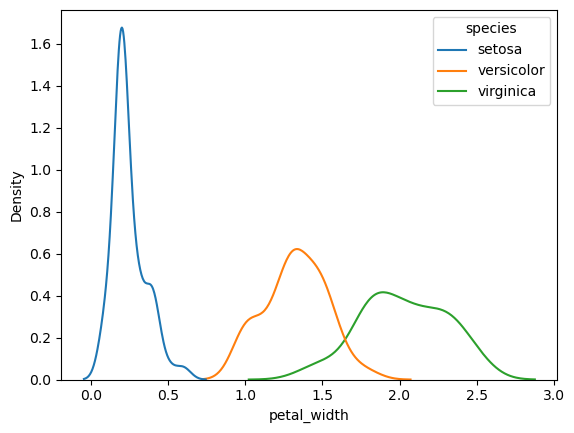

In [34]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

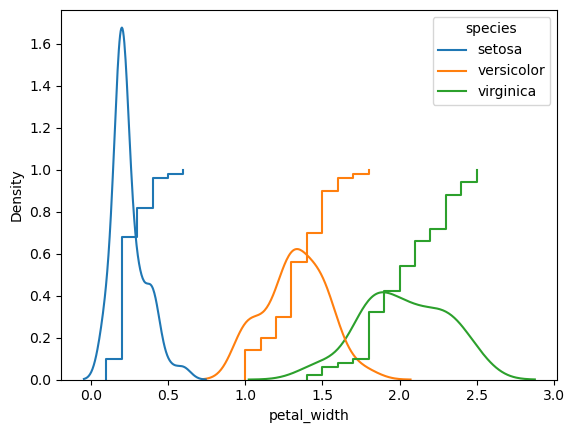

In [35]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [79]:
titanic = pd.read_csv('titanic_train.csv')

In [80]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

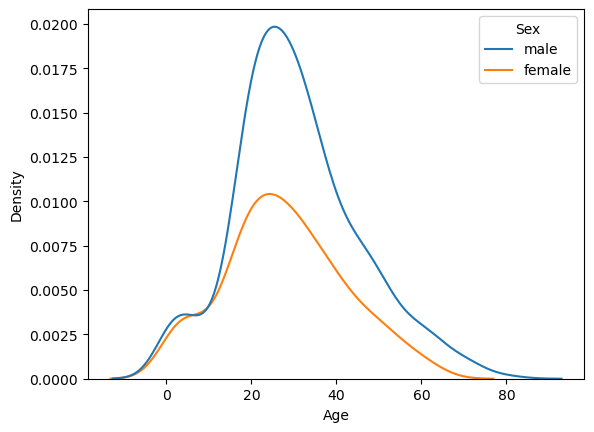

In [81]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

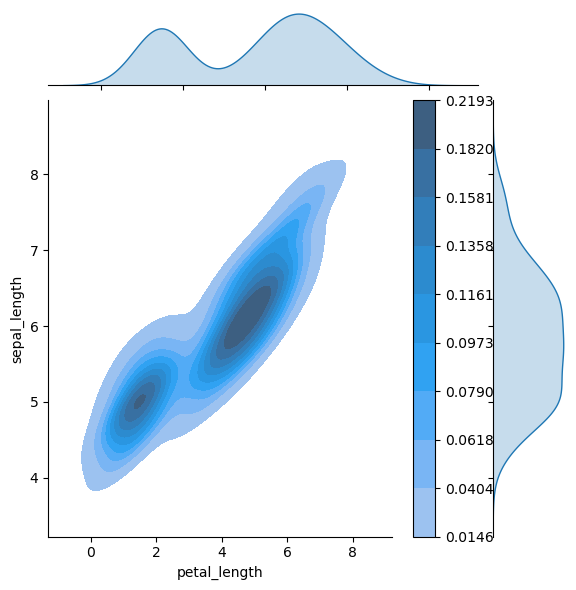

In [82]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

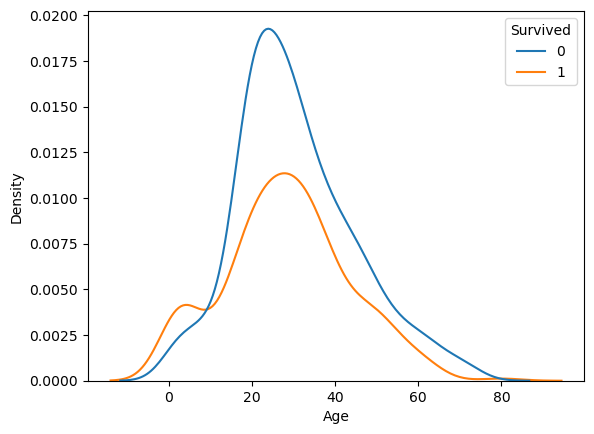

In [87]:
sns.kdeplot(data=titanic,x='Age',hue='Survived')

In [ ]:
titanic['Age'].mean()

In [84]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

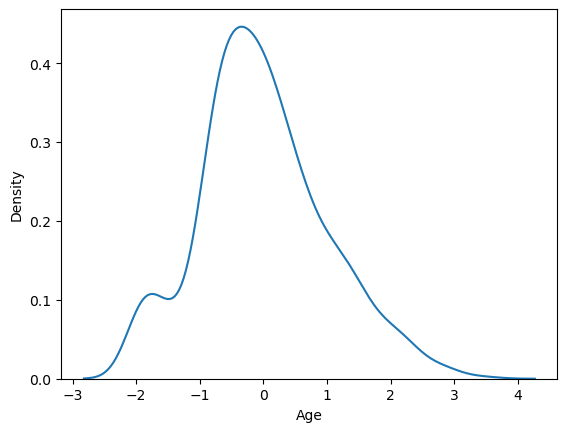

In [85]:
sns.kdeplot(x)

In [44]:
x.mean()

2.388378943731429e-16

In [45]:
x.std()

0.9999999999999994

In [46]:
titanic['Age'].skew()

0.38910778230082704

In [47]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406095

In [48]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.88037434994331

In [49]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [50]:
titanic['Age'].max()

80.0